In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


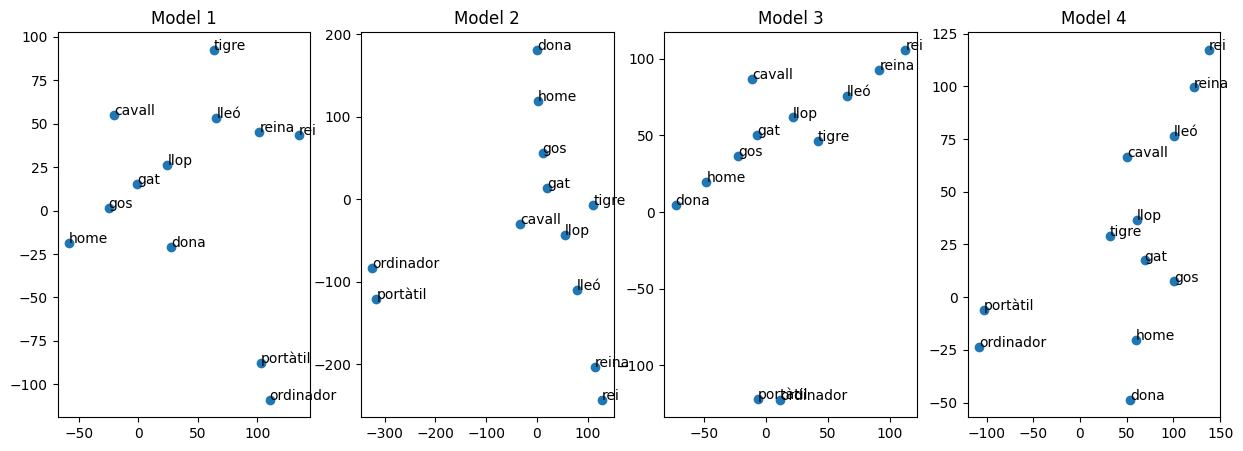

In [ ]:
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Defineix les paraules a visualitzar
words = ['rei', 'reina', 'home', 'dona', 'ordinador', 'portàtil', 'gat', 'gos', 'cavall', 'llop', 'lleó', 'tigre']

# Carrega els models de Word2Vec
model_paths = [
    '/content/drive/MyDrive/Pràctica 4 PLH/models Word2Vec/catalan_word2vec_100MB.model',
    '/content/drive/MyDrive/Pràctica 4 PLH/models Word2Vec/catalan_word2vec_500MB.model',
    '/content/drive/MyDrive/Pràctica 4 PLH/models Word2Vec/catalan_word2vec_1GB.model',
    '/content/drive/MyDrive/Pràctica 4 PLH/models Word2Vec/catalan_word2vec_complete.model'
]
models = [gensim.models.Word2Vec.load(model_path) for model_path in model_paths]

# Obté els vectors per a les paraules  en cada model
vectors_per_model = [np.array([model.wv[word] for word in words]) for model in models]

# Aplica t-SNE a cada conjunt de vectors
tsne_results = [TSNE(n_components=2, perplexity=2).fit_transform(vectors) for vectors in vectors_per_model]

# Visualitza els resultats de t-SNE
fig, axs = plt.subplots(1, len(models), figsize=(15, 5))

for i, tsne_result in enumerate(tsne_results):
    df = pd.DataFrame(tsne_result, index=words, columns=['x', 'y'])
    ax = axs[i]
    ax.scatter(df['x'], df['y'])
    for word, pos in df.iterrows():
        ax.annotate(word, pos)
    ax.set_title(f'Model {i+1}')

plt.show()


In [ ]:
from tabulate import tabulate

i = 1
table_data = []

for model in models:
    #resultat = model.wv.most_similar(positive=['actriu'], negative=['dona'], topn=5)
    #resultat = model.wv.most_similar(positive=['metge', 'hospital'], negative=[], topn=5)
    #resultat = model.wv.most_similar(positive=['cotxe', 'carretera'], negative=[], topn=5)
    #resultat = model.wv.most_similar(positive=['cadira', 'taula'], negative=['moble'], topn=5)
    resultat = model.wv.most_similar(positive=['caminar', 'córrer'], negative=['caminar'], topn=5)         #  --> model 2
    #resultat = model.wv.most_similar(positive=['comprar', 'vendre'], negative=['comprar'], topn=5)         #  --> model 2,3,4
    #resultat = model.wv.most_similar(positive=['inici'], negative=[], topn=5)                               #  --> model 3,4
    #resultat = model.wv.most_similar(positive=['arbre', 'bosc'], negative=['arbre'], topn=5)
    row = [f"Model {i}"]
    for res in resultat:
        row.append(res[0])
    table_data.append(row)
    i += 1

print(tabulate(table_data, tablefmt="grid"))

+---------+----------+-------+---------+-----------+---------+
| Model 1 | empènyer | pujar | estirar | marxar    | atrapar |
+---------+----------+-------+---------+-----------+---------+
| Model 2 | correr   | nedar | pedalar | relliscar | moure   |
+---------+----------+-------+---------+-----------+---------+
| Model 3 | pedalar  | volar | nedar   | correr    | dormir  |
+---------+----------+-------+---------+-----------+---------+
| Model 4 | nedar    | volar | pedalar | patinar   | còrrer  |
+---------+----------+-------+---------+-----------+---------+


In [ ]:
i = 1
table_data = []

for model in models:
    #resultat = model.wv.similar_by_word('home', topn=5)
    resultat = model.wv.similar_by_word('professor', topn=5)
    resultat = model.wv.similar_by_word('metge', topn=5)
    resultat = model.wv.similar_by_word('gat', topn=5)        # --> model 2,3
    resultat = model.wv.similar_by_word('cadira', topn=5)     # --> model 2,3,4
    resultat = model.wv.similar_by_word('ordinador', topn=5)  # --> model 1,2,3,4
    resultat = model.wv.similar_by_word('clau', topn=5)       # --> model 1,2,3,4
    resultat = model.wv.similar_by_word('córrer', topn=5)
    row = [f"Model {i}"]
    for res in resultat:
        row.append(res[0])
    table_data.append(row)
    i += 1

print(tabulate(table_data, tablefmt="grid"))

+---------+---------+----------+-------+---------+-----------+
| Model 1 | caminar | empènyer | pujar | estirar | marxar    |
+---------+---------+----------+-------+---------+-----------+
| Model 2 | caminar | correr   | nedar | pedalar | relliscar |
+---------+---------+----------+-------+---------+-----------+
| Model 3 | caminar | pedalar  | volar | nedar   | correr    |
+---------+---------+----------+-------+---------+-----------+
| Model 4 | caminar | nedar    | volar | pedalar | patinar   |
+---------+---------+----------+-------+---------+-----------+
